In [33]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import data:

In [34]:
# Importing the csv data:

data = pd.read_csv('train.csv')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Data cleaning:

In [38]:
# Checking if there are duplicates:

data2 = data.drop_duplicates()

In [39]:
# Checking if there are NULLs:

nulls_data = pd.DataFrame(round(data.isna().sum() / len(data2), 4) * 100)
nulls_data = nulls_data.rename(columns={'index':'header', 0: '% nulls'})
nulls_data

,% nulls
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [40]:
data2['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

D:\Programes\Anaconda3\envs\class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

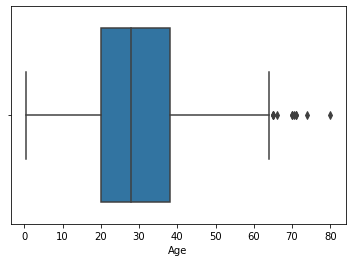

In [41]:
sns.boxplot(data2['Age'])

In [42]:
# To fill the NULL values for the 'Age' column we will use the MEDIAN because we have some outliers:

med_data = data2['Age'].median()
data2['Age'] = data2['Age'].fillna(med_data)

In [43]:
# To get the proper age, we will round the values (floor):

for x in data2['Age']:
    floor = math.floor(x)
    data2['Age'] = data2['Age'].replace(x, floor)

In [44]:
# Converting 'Age' values from float to INT:

data2['Age'] = data2['Age'].astype(int)

In [45]:
data2['Age'].value_counts()

28    204
24     31
22     27
30     27
18     26
     ... 
12      1
66      1
53      1
80      1
74      1
Name: Age, Length: 71, dtype: int64

In [46]:
# 'Cabin' column:

data2['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Because there are almost 80% of NULL values, we will drop 'Cabin' column because it seems that is not relevant. Besides, the same happens with 'PassengerId', 'Ticket', 'Name', 'Fare' and 'Embarked'.

In [47]:
data2 = data.drop(['Cabin', 'PassengerId', 'Ticket', 'Name', 'Fare', 'Embarked'], axis = 1)

In [48]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [49]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [50]:
data2.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0


In [51]:
data2['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [52]:
# Converting column 'Age' to binary:

def clean_sex(x):
    if x == 'female':
        return 1
    else:
        return 0

In [53]:
data2['Sex'] = data2['Sex'].apply(clean_sex)

In [54]:
data2['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [55]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [56]:
data2.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0


# EDA:

In [57]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

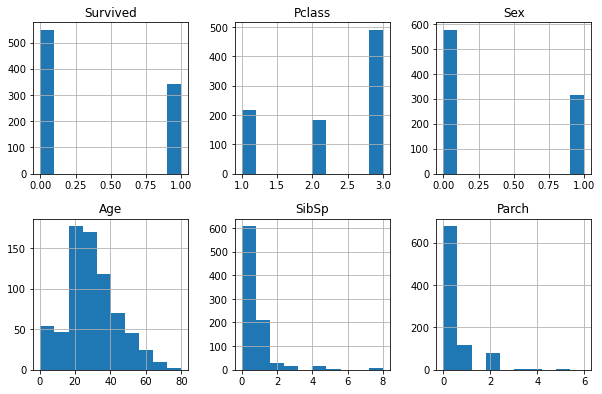

In [58]:
data2.hist(figsize = (10, 10), bins = 10, layout = (3, 3))

In [59]:
numerical = data2._get_numeric_data()

corre_matrix = numerical.corr()
corre_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000


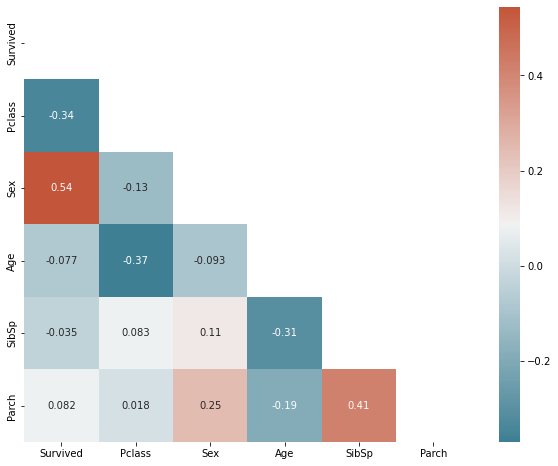

In [60]:
mask = np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corre_matrix, mask = mask, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap = True));

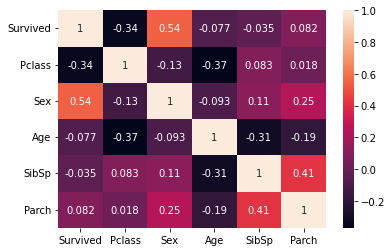

In [61]:
sns.heatmap(corre_matrix, annot = True);